In [1]:
import wget
wget.download('https://bank.gov.ua/NBU_Exchange/exchange_site?start=20210101&end=20211231&valcode=usd&sort=exchangedate&order=asc&json', out='exchange_usd' )
wget.download('https://bank.gov.ua/NBU_Exchange/exchange_site?start=20210101&end=20211231&valcode=EUR&sort=exchangedate&order=asc&json', out='exchange_eur' )


-1 / unknown

'exchange_eur'

In [17]:
import pandas as pd

with open("exchange_usd") as file:
    data = file.read()
    
with open("exchange_eur") as file2:
    data2 = file2.read()

df = pd.read_json(data)
df.to_csv('exchange_usd.csv')

df2 = pd.read_json(data2)
df2.to_csv('exchange_eur.csv')

In [18]:
import boto3

s3 = boto3.client('s3')
s3.upload_file('exchange_usd.csv', "lab2bucketlab2", "exchange_usd.csv")
s3.upload_file('exchange_eur.csv', "lab2bucketlab2", "exchange_eur.csv")

<function matplotlib.pyplot.show(close=None, block=None)>

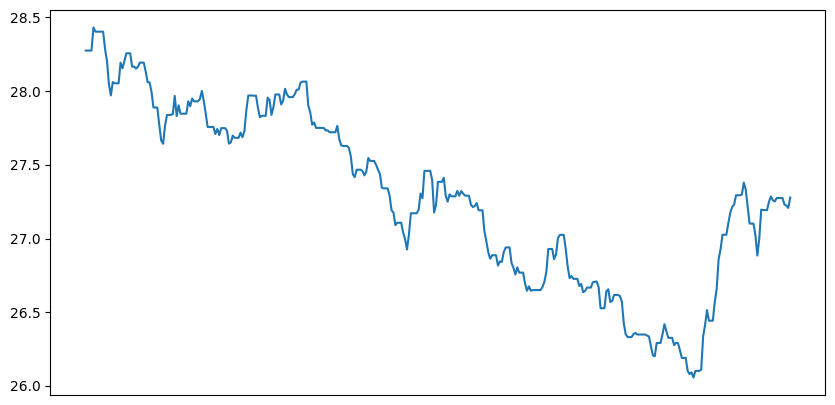

In [19]:
import boto3
import pandas as pd
from matplotlib import pyplot as plt 

s3 = boto3.client('s3')
bucket='lab2bucketlab2'
data = s3.get_object(Bucket=bucket, Key='exchange_usd.csv')
contents = data['Body'].read()
contents = contents.decode("utf-8")
f = open('FromBucket/exchange_usd.csv', 'w')
f.write(contents)
f.close()

data = s3.get_object(Bucket=bucket, Key='exchange_eur.csv')
contents = data['Body'].read()
contents = contents.decode("utf-8")
f = open('FromBucket/exchange_eur.csv', 'w')
f.write(contents)
f.close()

df = pd.read_csv('FromBucket/exchange_usd.csv', sep=',', header=0)
df.head()

x = df["exchangedate"] 
y = df["rate"] 
plt.figure(figsize=(10, 5))
plt.xticks([])
plt.plot(x,y)
plt.show

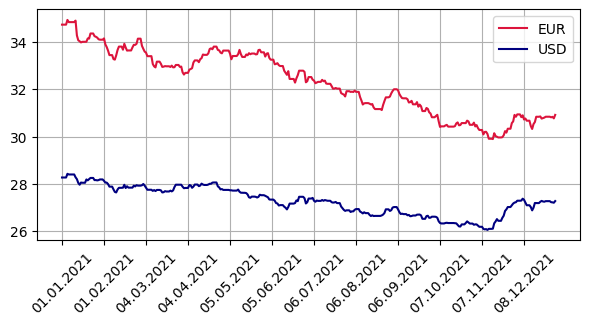

In [39]:
import numpy as np
df_usd = pd.read_csv('FromBucket/exchange_usd.csv', sep=',', header=0)
df_eur = pd.read_csv('FromBucket/exchange_eur.csv', sep=',', header=0)

x1 = df_usd["exchangedate"] 
y1 = df_usd["rate"] 
y2 = df_eur["rate"] 
plt.figure(figsize=(7, 3))
plt.xticks(np.arange(0, len(x1), 31), rotation=45)
plt.plot(x1,y2, label='EUR', color='crimson')
plt.plot(x1,y1, label='USD', color='navy')
plt.grid(True)
plt.legend()
plt.show
plt.savefig('exchange.png')

In [41]:
s3 = boto3.client('s3')
s3.upload_file('exchange.png', "lab2bucketlab2", "exchange.png")